In [0]:
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
!cd My\ Drive

In [0]:
cd forest-fire-colab\ 

/content/drive/My Drive/forest-fire-colab 


In [0]:
!pip install imageai --upgrade

     |████████████████████████████████| 184kB 3.5MB/s 


In [0]:
from imageai.Detection.Custom import CustomObjectDetection

Using TensorFlow backend.


In [0]:
detector1 = CustomObjectDetection()

In [0]:
detector1.setModelTypeAsYOLOv3()

In [0]:
detector1.setModelPath(detection_model_path="detection_model-ex-33--loss-4.97.h5")

In [0]:
detector1.setJsonPath(configuration_json="detection_config.json")

In [0]:
detector1.loadModel()

In [0]:
import numpy as np

In [0]:
from matplotlib import pyplot as plt

In [0]:
from PIL import Image

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
import cv2 

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import time

In [0]:
!pip install requests
import requests
import json

In [0]:
def message():
  URL = 'https://www.sms4india.com/api/v1/sendCampaign'

  # get request
  def sendPostRequest(reqUrl, apiKey, secretKey, useType, phoneNo, senderId, textMessage):
    req_params = {
    'apikey':apiKey,
    'secret':secretKey,
    'usetype':useType,
    'phone': phoneNo,
    'message':textMessage,
    'senderid':senderId
    }
    return requests.post(reqUrl, req_params)

  # get response
  response = sendPostRequest(URL,'OWEK7EHVO0KL703ZOVDX49S8YWCHN4ZY','VZDUJBFPVJZ9IMHG', 'stage', '8209081464', 'www.sms4india.com/api/v1/createSenderId', 'Fire-detected,latitude:30.3564° N,longitude: 76.3647° E' )
  """
    Note:-
      you must provide apikey, secretkey, usetype, mobile, senderid and message values
      and then requst to api
  """
  # print response if you want
  print (response.text)

<IPython.core.display.Javascript object>

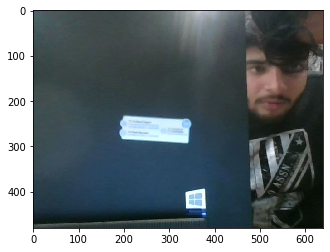

FPS 0.4


<IPython.core.display.Javascript object>

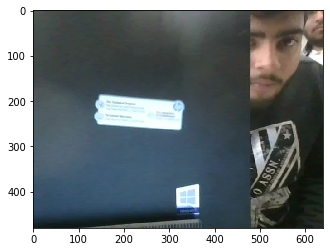

FPS 0.3


<IPython.core.display.Javascript object>

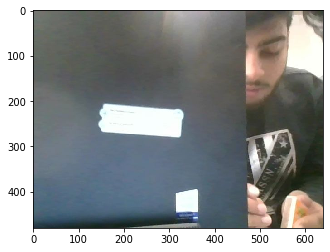

FPS 0.4


<IPython.core.display.Javascript object>

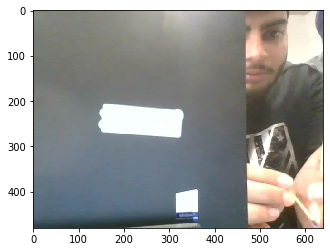

FPS 0.4


<IPython.core.display.Javascript object>

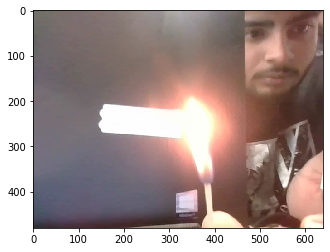

FPS 0.4


<IPython.core.display.Javascript object>

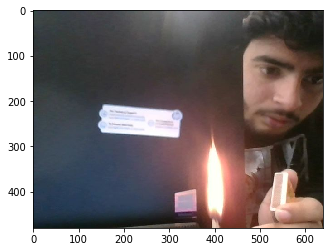

FPS 0.4


<IPython.core.display.Javascript object>

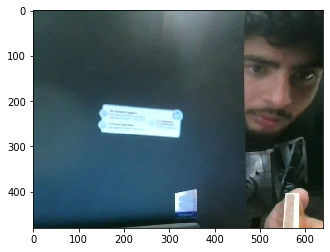

FPS 0.4


<IPython.core.display.Javascript object>

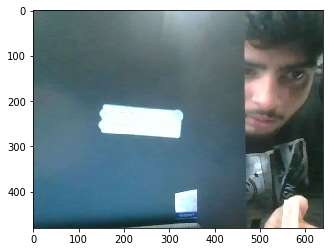

FPS 0.4


<IPython.core.display.Javascript object>

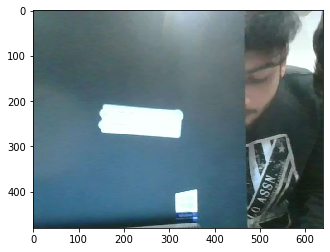

FPS 0.4


<IPython.core.display.Javascript object>

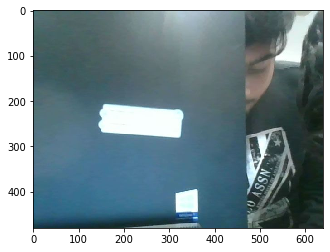

FPS 0.4


<IPython.core.display.Javascript object>

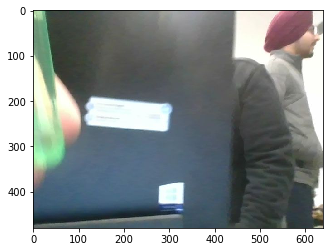

FPS 0.4


<IPython.core.display.Javascript object>

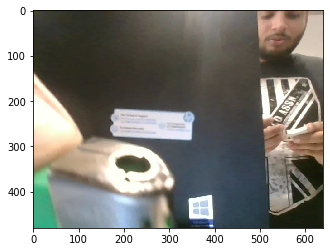

FPS 0.3


<IPython.core.display.Javascript object>

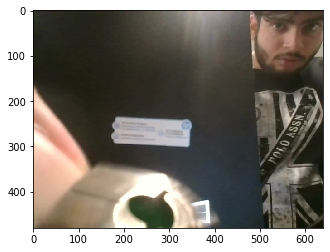

FPS 0.4


<IPython.core.display.Javascript object>

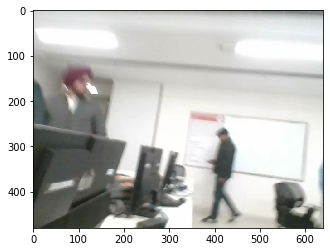

FPS 0.4


<IPython.core.display.Javascript object>

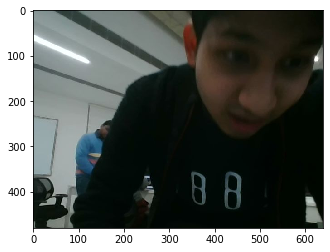

FPS 0.4


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [0]:

def take_photo(filename='photo.jpg', quality=0.8):

  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  from urllib.request import urlopen
  data = eval_js('takePhoto({})'.format(quality))
  resp = urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # return the image
  return image

# to capture an image
while(1):
  stime = time.time()
  img = take_photo()
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  cv2.imwrite('your_file.jpeg', gray_img)
  ##im = Image.fromarray(gray_img)
  ##im.save("your_file.jpeg")
  results = detector1.detectObjectsFromImage(input_image='your_file.jpeg',
                                                 output_image_path= "67-detected.png",minimum_percentage_probability=40)
  if(len(results)>0):
    im = cv2.imread("67-detected.png")
    print(results)
    plt.imshow(im)
    plt.show()
    message()
    break
  else:
      plt.imshow(gray_img)
      plt.show()
  print('FPS {:.1f}'.format(1 / (time.time() - stime)))

In [0]:
##results = detector1.detectObjectsFromImage(input_image='58dbc963-511f-4d9e-a7e2-989edd854211.jfif',
                                                 output_image_path= "67-detected.png",minimum_percentage_probability=30)